# File de priorité - structures de tas

[Vidéo d'accompagnement](https://vimeo.com/516288038)

## Introduction

Une **file de priorité** «max» (resp. «min») est un *ensemble «dynamique»* qui offre principalement les opérations suivantes:
- `.inserer(elt)`: insère un élément,

- `.extraire_max()`: (ou `_min`) renvoie l'élément ayant la clé la plus grande tout en supprimant cet élément.

- `.augmenter_clé(i, valeur)`: (ou `_diminuer`) modifie la clé d'index `i` avec la valeur fournie qui doit *être supérieure à l'ancienne valeur*

L'objectif est de fournir ces opérations avec un coût minimum. Nous verrons quelques applications des files de priorité (*priority queue*) un peu plus tard (ordonnancement des processus, codage de Huffmann...)

## Stratégie naïve

On peut penser à utiliser une *structure linéaire* (tableau, liste chaînée) et à maintenir ses éléments dans l'ordre croissant au fur et à mesure des opérations.

Voici comment on pourrait s'y prendre en spécialisant le type `list`:

In [ ]:
class FilePrioriteMax(list):
    
    def inserer(self, valeur):
        self.append(valeur)
        i = len(self) - 2
        while i >= 0 and self[i] > valeur:
            self[i], self[i+1] = self[i+1], self[i] # swap
            i -= 1
    
    def extraire_max(self):
        return self.pop()
    
    def augmenter_cle(self, i, valeur):
        if valeur < self[i]:
            raise Exception("valeur fournie inférieure à valeur courante")
        self[i] = valeur
        while i < len(self) - 1 and self[i] > self[i+1]:
            self[i], self[i+1] = self[i+1], self[i]
            i += 1

Cela a le mérite d'être (relativement) simple. Voici un exemple interactif d'utilisation:

In [ ]:
from random import randint
fpm = FilePrioriteMax()
# on y insère 10 éléments au hasard
for _ in range(10):
    fpm.inserer(randint(1, 100))
print(f"\tfpm = {fpm}\n");
# choisir l'un des opérations pour voir l'effet sur le tableau
while True:
    op = input("inserer (1), extraire_max (2) augmenter_cle (3)? ")
    if not op in "123":
        break
    if op == "1":
        fpm.inserer(int(input("valeur? ")))
    elif op == "2":
        print(f"\tmax = {fpm.extraire_max()}")
    else:
        fpm.augmenter_cle(int(input("index?")), int(input("valeur?")))
    print(f"\tfpm = {fpm}\n")

#### Exercice

Quels sont les coûts respectifs de ces trois opérations?

#### Solution

La boucle de `inserer`, dans le cas où on insère une valeur plus grandes que celles déjà présentes dans la file (pire des cas), produira $n$ itérations donc `inserer` est $O(n)$. Notez que si l'on s'en sert $n$ fois pour construire une file de taille $n$, le coût de construction de la file est est $O(n^2)$ ($1+2+\cdots+n$).

`extraire_max` est $O(1)$ comme le pop sous-jacent des listes de Python.

Enfin, `augmenter_cle` est $O(n)$ car il y a aura $n$ itérations si on augmente la clé de la première valeur en lui donnant une valeur supérieure à celles des autres éléments.

## Arbre binaire organisé en tas max

On peut résoudre de façon plus efficace ce problème en se contentant d'un **ordre partiel** (plutôt que *total* comme précédemment). L'idée est d'utiliser un *arbre binaire* organisé en «**tas max**». Cela signifie précisément qu'il doit vérifier les deux conditions suivantes:

> 1. l'arbre binaire est **parfait**: *tous ses niveaux sont remplis de gauche à droite sauf peut-être le dernier*. 
>
>  **Objectif**: minimiser sa hauteur.
>
> 2. tout noeud porte une **clé supérieure** (ou au pire égale) **à celles de ses enfants**.    
>
>  **Objectif**: repérer facilement le max sans pour autant imposer un ordre total.

*Attention à ne pas confondre* **tas max** et **arbre binaire de recherche**: *ils n'ont rien à voir!*

Un arbre binaire *parfait* a la particularité suivante: la numérotation par niveau est «sans trou». Cette particularité permet de représenter un tel arbre de façon très compacte à l'aide d'un **tableau**.

<p style="text-align: center;">
    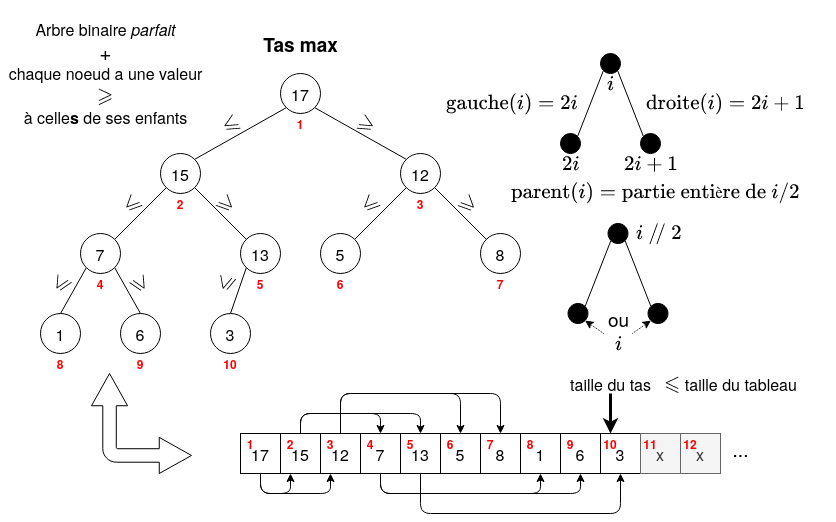
</p>

Prenez garde que les noeuds sont numérotés à partir de **1** (pour une fois).

Si `i` est le numéro d'un noeud alors, s'il existe:
- son **parent** a le numéro `i // 2` (quotient de la division entière de `i` par `2`)
- son **enfant gauche** a le numéro `2*i`,
- son **enfant droit** a le numéro `2*i + 1`

si on dénote par `j` la numérotation à partir de **0** alors `j = i - 1` et la formule du «parent» devient:

    j_parent = i_parent - 1 
             = i // 2 - 1 
             = (j+1) // 2 - 1 
             
    soit j_p = parent(j) = (j+1) // 2 - 1

#### Exercice

Chercher les deux autres formules et implémenter.

In [ ]:
def parent(j): # numérotation python (à partir de 0)
    pass

def gauche(j):
    pass

def droit(j):
    pass

In [ ]:
def parent(j): # numérotation python (à partir de 0)
    return (j+1)//2-1

def gauche(j):
    return 2*(j+1)-1

def droit(j):
    return 2*(j+1)

### classe `TasMax`

Par la suite, nous utiliserons une classe dédiée:

In [ ]:
class TasMax:
    
    def __init__(self, tableau=None):
        self._t = []
        # attention: la taille du tas peut différer de celle du tableau _t.
        self.taille = 0
        if tableau is not None:
            self._construire(tableau) # voir plus loin
    
    def __len__(self):
        return self.taille
    
    def get_tableau(self): # pour les tests
        return self._t.copy()
    
    def _construire(self, tableau):
        pass # sera implémentée un peu plus loin

#### Note sur le mot «**tas**»

Ce mot évoque une collection de données *faiblement* structurée.

Il est couramment utilisé en informatique pour désigner une zone mémoire variable d'un programme en cours d'exécution (processus) dans laquelle celui-ci peut effectuer des *allocation/désallocation*. 

Par exemple, les objets muables comme les *list* sont gérées dans *le tas* du fait que ses structures peuvent être modifiées pendant l'éxécution du programme.

Python gère automatiquement le tas comme nous l'avions expérimenté avec `__del__`. Mais, dans un langage comme **C**, le programmeur doit gérer lui-même cette zone à l'aide des primitives `malloc` et `free` (notamment).

Le tas comme *zone mémoire variable* et la *structure de données tas* dont nous parlons ici n'ont que le nom en commun!

## Procédure `_entasser_max`

*Note*: le mot de «*procédure*» désigne une fonction (ou une méthode) qui ne renvoie rien et dont le rôle est souvent de modifier une structure en la réorganisant.

Pour *implémenter* notre **tas max**, nous allons commencer par résoudre le sous-problème suivant:

> On suppose que tous les noeuds de l'arbre enraciné au noeud d'index `i` vérifient la propriété de tas max (\*) *sauf peut-être le noeud `i` (sa racine)*. On demande de rectifier cette situation de façon que l'arbre enraciné en `i` soit un tas-max.
>
> (\*) sa valeur est supérieure à celles de ses deux enfants.

La méthode `._entasser_max(i)` doit résoudre le problème précédent.

<p style="text-align: center;">
    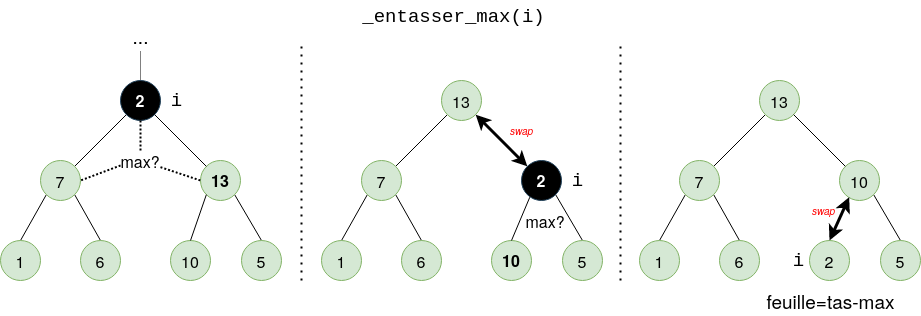
</p>

L'idée est de comparer la valeur du noeud `i` avec celles de ces enfants afin d'effectueur un échange si besoin. Si l'échange a lieu, le noeud `i` vérifie la propriété de tas-max et il y a alors deux cas possibles:
- le sous-arbre qui reçoit la valeur à sa racine est un tas-max: le problème est réglé!
- **sinon**, on se retrouve avec un problème *similaire* avec un arbre plus petit...

#### Exercice

Réfléchir au coût de cette procédure puis implémenter la:

In [ ]:
def _entasser_max(self, i):
    pass

TasMax._entasser_max = _entasser_max
del _entasser_max

#### Solution

Le nombre d'actions est clairement au plus égal à la hauteur de l'arbre qui est $\log n$ si l'arbre contient $n$ valeurs.

In [ ]:
def _entasser_max(self, i):
    i_max = i #
    g, d = gauche(i), droit(i)
    # chercher l'index du noeud qui contient la plus grande valeur
    #       attention à tenir compte de la taille du tas
    if g < self.taille and self._t[g] > self._t[i]:
        i_max = g
    if d < self.taille and self._t[d] > self._t[i_max]:
        i_max = d
    # éventuellement, échange et récursion
    if i_max != i:
        self._t[i], self._t[i_max] = self._t[i_max], self._t[i]
        self._entasser_max(i_max)

TasMax._entasser_max = _entasser_max
del _entasser_max

Nous testerons cette solution dans la section suivante.

## Construction d'un tas à partir d'un tableau

On suppose donné un tableau `tab`. Notre but est de *produire un tas-max à partir de celui-ci*.

On peut déjà lire le tableau comme un arbre binaire «*parfait*» et il faut observer que ses feuilles sont déjà des tax-max (trivialement).

L'idée est d'appliquer `__entasser_max` «en remontant» l'arbre niveau par niveau à partir du dernier noeud *interne* (dans la numérotation par niveau). Plus précisément, on parcourt l'arbre: 
- *de la droite vers la gauche* et *du bas vers le haut* (donc **par index décroissant**) ,
- à partir du dernier noeud interne et jusqu'au noeud racine.

<p style="text-align: center;">
    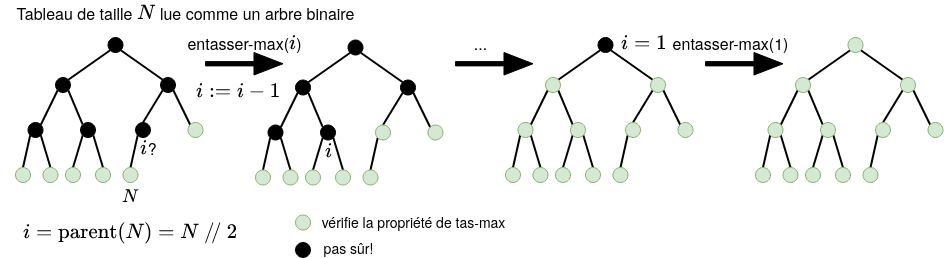
</p>

#### Exercice

1. Décrire étape par étape la construction d'un tas-max à partir du tableau `[14, 9, 20, 15, 19, 12, 10, 13]`.
2. Implémenter la méthode interne `_construire(tableau)`

In [ ]:
def _construire(tab):
    self._t = tableau
    self.taille = len(tableau)
    pass

TasMax._construire = _construire
del _construire

#### Solution

**1** Voici ces étapes dans la représentation tableau

        * pour le père, _ pour le ou les enfants 
        [14, 9, 20, *15*, 19, 12, 10, _13_]             15 > 13: rien à faire 
        [14, 9, *20*, 15, 19, _12_, _10_, 13]           20 > 12 et 20 > 10: rien à faire
        [14, *9*, 20, _15_, _19_, 12, 10, 13]           échange avec 19 et entasser encore mais
            [14, 19, 20, 15, *9*, 12, 10, 13]             9 n'a pas d'enfant
        [*14*, _19_, _20_, 15, 9, 12, 10, 13]           échange avec 20 et entasser encore mais
            [20, 19, *14*, 15, 9, _12_, _10_, 13]         14 a deux enfants de valeurs inférieures.
        
        Résultat [20, 19, 14, 15, 9, 12, 10, 13].

**2** Implémentation de _construire

In [ ]:
def _construire(self, tableau):
    self._t = tableau
    self.taille = len(tableau)
    # i: index du dernier noeud interne
    i = parent(self.taille-1)
    while i >= 0:
        self._entasser_max(i)
        i -= 1

TasMax._construire = _construire
del _construire

#### Testez

In [ ]:
import pytest
# spécifique aux notebooks
import ipytest
ipytest.autoconfig()

In [ ]:
@pytest.fixture()
def tas_simple():
    return TasMax([14, 9, 20, 15, 19, 12, 10, 13])

from random import randint

@pytest.fixture()
def tas_aleatoire():
    return TasMax([randint(0, 1000) for _ in range(100)])

In [ ]:
%%run_pytest[clean]

def test_construire(tas_simple, tas_aleatoire):
    assert tas_simple.get_tableau() == [20, 19, 14, 15, 9, 12, 10, 13]
    t = tas_aleatoire.get_tableau()
    i = len(tas_aleatoire)-1
    while i >= 1:
        assert t[parent(i)] >= t[i]
        i -= 1

#### Efficacité

Comme la hauteur d'un tas est voisine de $\log n$ où $n$ est le nombre de noeuds de l'arbre et qu'à chaque itération l'opération `entasser` est proportionnelle (en temps) à la hauteur de l'arbre, on s'attend à une efficacité en $O(n\log n)$ au pire.

En fait, la situation est meilleure comme on peut le «sentir». On démontre - c'est un peu technique - que:

> le coût de construction d'un tas à partir d'un tableau est $O(n)$.

## Tri par tas

Même si ça n'a rien à voir avec la problématique «file de priorité», il se trouve qu'on peut trier un tableau à l'aide d'un tas et que c'est un tri *très efficace* appelé **tri par tas**.

Le tri par tas commence par tranformer le tableau fourni en un tas-max (pour un tri ascendant) à l'aide de l'algorithme précédent.

Cela fait, on parcourt le tas depuis le bas jusqu'à la racine *exclue* et, à chaque itération:
- on échange la valeur du noeud courant avec celle de la racine,
- on «détache» le dernier noeud en décrémentant la taille du tas (d'une unité)
- on appelle `_entasser_max` sur la racine.

Voici une illustration (un noeud vert vérifie la propriété de tas-max, un noeud rouge fait partie du tableau mais pas du tas).

<p style="text-align: center;">
    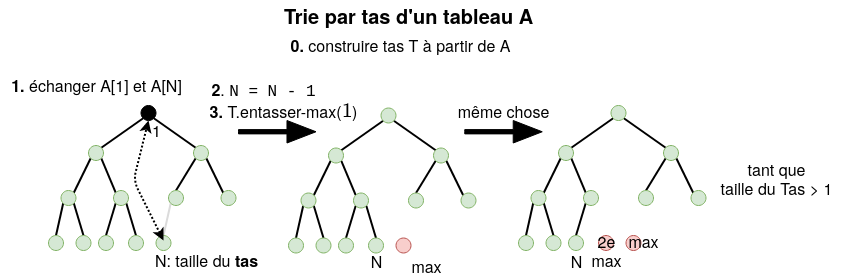
</p>

Voilà un exemple de ce que cela donne dans la représentation «tableau»:

<p style="text-align: center;">
    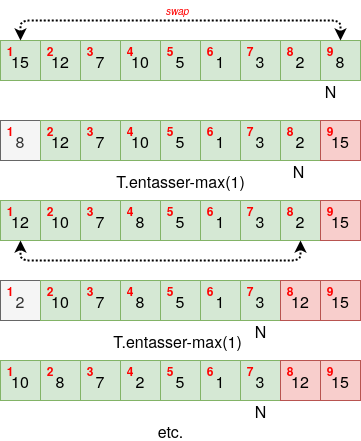
</p>

Le tableau est trié «en place» (inutile de retourner quoi que ce soit)

#### Exercice

1. Analyser la complexité du tri par tas.

2. L'implémenter comme une méthode «statique» (voir note plus bas) de la classe `TasMax`.

*Note sur la notion de méthode statique*

une **méthode statique** ne s'appuie pas sur les instances d'une classe. On peut la voir comme
une fonction «attachée» à une classe.

Pour l'appeler, on utilise le nom de la classe et non celui d'une instance de celle-ci. Par exemple:

```python
tableau = [....]
TasMax.trier(tableau) # tableau trié en place (pas de valeur de retour)
# à partir de là, tableau est trié
```

In [ ]:
def trier(tab):
    tas = ___
    pass

TasMax.trier = staticmethod(trier) # on peut aussi utiliser le décorateur @staticmethod
del trier

In [ ]:
def trier(tableau):
    tas = TasMax(tableau)
    while tas.taille > 1:
        tas._t[0], tas._t[tas.taille-1] = tas._t[tas.taille-1], tas._t[0]
        tas.taille -= 1
        tas._entasser_max(0)

TasMax.trier = staticmethod(trier) # on peut aussi utiliser le décorateur @staticmethod
del trier

In [ ]:
%%run_pytest[clean]

def test_trier():
    tableau = [randint(0, 100) for i in range(15)]
    TasMax.trier(tableau)
    for i in range(len(tableau)-1):
        assert tableau[i] <= tableau[i+1]

### Efficacité

La construction du tas est $O(n)$. Ensuite, chaque itération est dominée par le coût de `entasser` qui est $O(\log n)$. Comme il y a $n$ itérations, le coût de la boucle sera $O(n\log n)$. Ce dernier domine le côut de la construction du tas et c'est donc aussi le coût de ce tri:

> Le tri par tas a un coût de $O(n\log n)$.

## `extraire_max`

L'idée est similaire à la précédente. Si le tas est non vide:
1. échanger la valeur de la racine avec celle du dernier noeud,
2. décrémenter la taille du tas (inutile de faire un pop!),
3. puis entasser la valeur située à la racine pour rétablir la propriété de tas-max.

In [ ]:
def max(self):
    """Renvoie le max sans le supprimer"""
    if self.taille == 0:
        raise IndexError("Le tas est vide!")
    pass
   
def extraire_max(self):
    """Renvoie le max tout en le supprimant du tas"""
    if self.taille == 0:
        raise IndexError("Le tas est vide!")
    pass

In [ ]:
def _max(self):
    """Renvoie le max sans le supprimer"""
    if self.taille == 0:
        raise IndexError("Le tas est vide!")
    return self._t[0]
   
def extraire_max(self):
    """Renvoie le max tout en le supprimant du tas"""
    if self.taille == 0:
        raise IndexError("Le tas est vide!")
    r = self._t[0]
    self._t[0] = self._t[self.taille-1]
    self.taille -= 1
    self._entasser_max(0)
    return r

TasMax.max = _max; TasMax.extraire_max = extraire_max
del _max; del extraire_max

In [ ]:
%%run_pytest[clean]

def test_extraire_max(tas_aleatoire):
    N = n = len(tas_aleatoire)
    liste = []
    for _ in range(N):
        liste.append(tas_aleatoire.extraire_max())
        n -= 1
        assert len(tas_aleatoire) == n
    for i in range(N-1):
        assert liste[i] >= liste[i+1]
    with pytest.raises(IndexError):
        tas_aleatoire.extraire_max()

## `augmenter_cle`

Lorsqu'on augmente la clé d'un noeud d'un tas max, son noeud **parent** peut ne plus satisfaire la propriété de tax max (et seulement lui). On doit donc «remonter» le long des ancêtres du noeud visé afin de rétablir la propriété de tas max. Voici un exemple:

<p style="text-align: center;">
    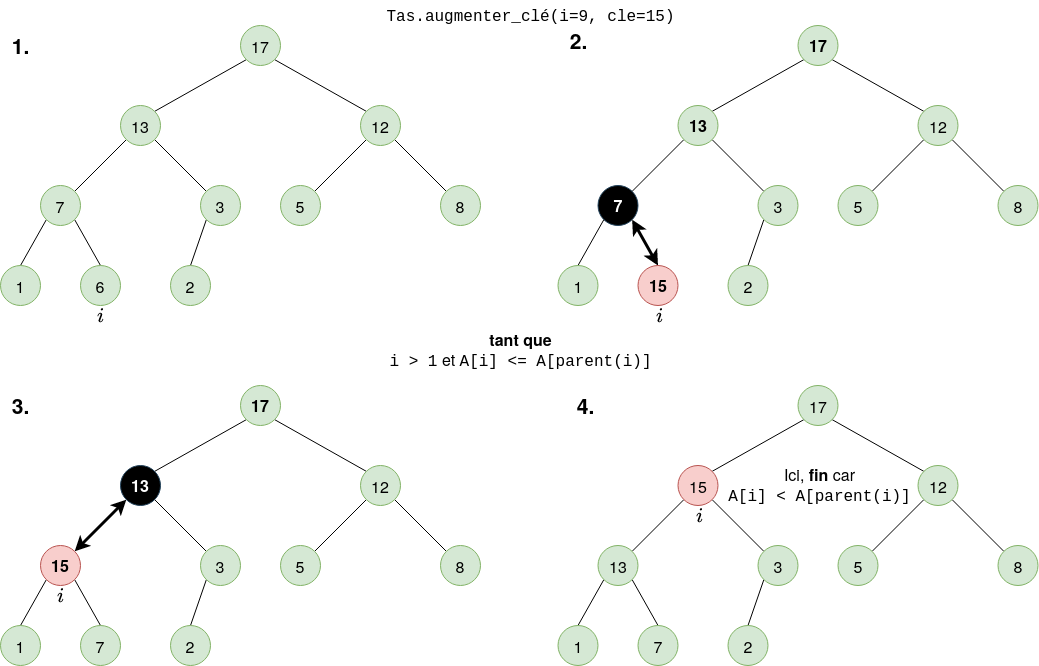
</p>

#### Exercice

Implémenter!

In [ ]:
def augmenter_cle(self, i, valeur):
    """modifie la valeur du noeud d'index i avec une valeur supérieure à celle qu'il avait antérieurement"""
    if i >= self.taille:
        raise IndexError("indice non valide")
    if valeur < self._t[i]:
        raise Exception(f"{valeur} est plus petite que la valeur courante {self._t[i]}")
    pass

In [ ]:
def augmenter_cle(self, i, valeur):
    """modifie la valeur du noeud d'index i avec une valeur supérieure à celle qu'il avait antérieurement"""
    if i >= self.taille:
        raise IndexError("indice non valide")
    if valeur < self._t[i]:
        raise Exception(f"{valeur} est plus petite que la valeur courante {self._t[i]}")
    self._t[i] = valeur
    ip = parent(i)
    while i > 0 and self._t[ip] < self._t[i]:
        self._t[ip], self._t[i] = self._t[i], self._t[ip]
        i = ip
        ip = parent(i)

TasMax.augmenter_cle = augmenter_cle
del augmenter_cle

In [ ]:
%%run_pytest[clean]

def test_augmenter_cle(tas_aleatoire):
    tab = tas_aleatoire.get_tableau()
    with pytest.raises(IndexError):
        tas_aleatoire.augmenter_cle(len(tas_aleatoire), 1000)
    with pytest.raises(Exception):
        i = randint(0, 99)
        tas_aleatoire.augmenter_cle(i, tab[i]-1)
    maxi = tab[0]
    tas_aleatoire.augmenter_cle(len(tas_aleatoire)-1, maxi+1)
    assert maxi+1 == tas_aleatoire.max()

## `inserer`

Le problème est en fait assez similaire au précédent: on insère le noeud à la suite du dernier (dernière feuille) puis on remonte ses ancêtres de façon à rétablir la propriété de tas-max pour ceux-ci.

Pour éviter de réécrire un code similaire à celui de `augmenter_cle`, on peut utiliser l'astuce suivante:
- insèrer un noeud de clé «$-\infty$» ( à la fin du tableau sous-jacent) puis
- appeller `augmenter_cle` sur ce noeud pour lui attribuer sa valeur définitive.

*Note*: Une valeur $-\infty$ se caractérise (entre autre) par la propriété d'être toujours inférieure à n'importe quelle autre. On peut produire une valeur ayant cette propriété avec `float("-inf")`.

#### Exercice

1. Implémenter en prenant garde à n'appeler `append` sur le tableau sous-jacent que si c'est nécessaire!

In [ ]:
def inserer(self, valeur):
    """insère la valeur dans le tas"""
    pass

TasMax.inserer = inserer
del inserer

In [ ]:
def inserer(self, valeur):
    """insère la valeur dans le tas"""
    self.taille += 1
    if len(self._t) < self.taille:
        self._t.append(float("-inf"))
    else:
        self._t[self.taille - 1] = float("-inf")
    self.augmenter_cle(self.taille-1, valeur)

TasMax.inserer = inserer
del inserer

In [ ]:
%%run_pytest[clean]

from random import shuffle
def test_inserer(tas_aleatoire):
    tab = tas_aleatoire.get_tableau()
    shuffle(tab)
    tas = TasMax()
    for v in tab:
        tas.inserer(v)
    assert len(tas) == len(tas_aleatoire)
    N = len(tas)
    for _ in range(N):
        assert tas_aleatoire.extraire_max() == tas.extraire_max()

2. Pour construire un tas à partir d'un tableau, on peut utiliser le constructeur (comme vu plus haut) ou utiliser `inserer` en boucle. Est-ce équivalent en terme de coût?

Nous avons vu que la première façon de faire est $O(n)$ tandis que la seconde est assez clairement $O(n\log n)$ puisqu'on peut avoir à descendre tout l'arbre à chaque fois (car d'une liste de départ triée dans le sens décroissant).

Il faut toutefois avoir à l'esprit qu'avec notre implémentation, le tableau donné au constructeur n'est pas copié (ce serait plus prudent de le faire mais cela ralentirai le tri par tas). Ainsi:

```python
mon_tableau = [...]
tas = TasMax(mon_tableau)
mon_tableau[0] = 10 # et vlan! le tas est probablement devenue inconsistant!!!
```